/Users/gerardmartinezcanelles/anaconda2/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:339: RuntimeWarning: covariance is not positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T


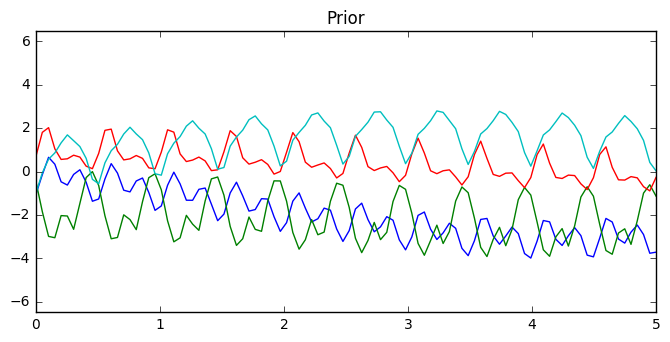

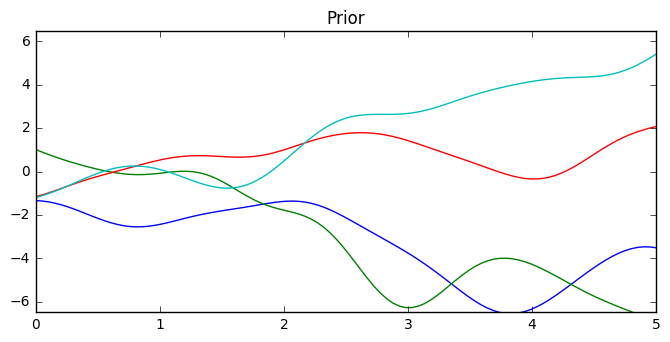

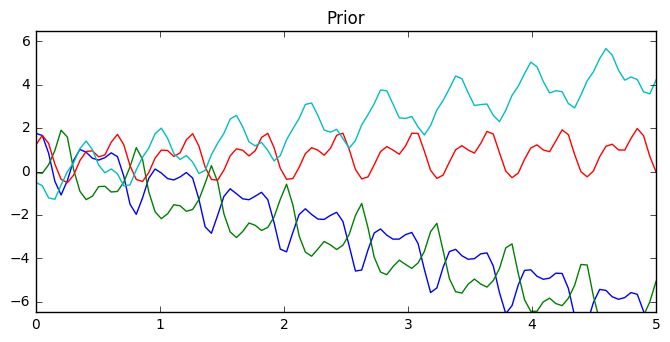

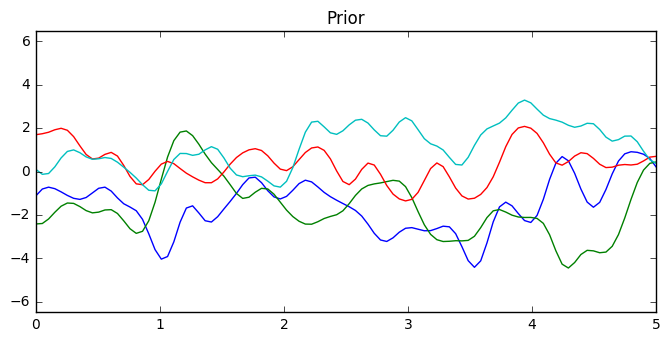

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import colors as mcolors

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)


kernels = [1.0*ExpSineSquared(length_scale=1.0,periodicity=0.5)+RBF(length_scale=3.0),
           0.4*DotProduct(sigma_0=1.0)+RBF(length_scale=0.5),
           0.4*DotProduct(sigma_0=1.0)+ExpSineSquared(length_scale=1.0,periodicity=0.6),
           0.8*RBF(length_scale=4.0)+1.2*RBF(length_scale=0.15)
          ]

for fig_index, kernel in enumerate(kernels):
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(fig_index, figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    #plt.plot(X_, y_mean, 'k', lw=3, zorder=9)  #dibuixa linia negra a la mitjana 0
    #plt.fill_between(X_, y_mean - y_std, y_mean + y_std,  #treiem la zona ombrejada corresponent a la desviacio std.
    #                 alpha=0.5, color='g')
    y_samples = gp.sample_y(X_[:, np.newaxis], 4)
    plt.plot(X_, y_samples, lw=1)
    plt.xlim(0, 5)
    plt.ylim(-6.5, 6.5)
    plt.title("Prior", fontsize=12)
plt.show()

In [3]:
#configure plotting
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib;matplotlib.rcParams['figure.figsize'] = (8,5)
from matplotlib import pyplot as plt
import GPy
import numpy as np

  sum.                              |  value  |  constraints  |  priors
  rbf.variance                      |    1.0  |      +ve      |        
  rbf.lengthscale                   |    1.0  |      +ve      |        
  periodic_exponential.variance     |   10.0  |      +ve      |        
  periodic_exponential.lengthscale  |    1.0  |      +ve      |        
  periodic_exponential.period       |    1.5  |      +ve      |        


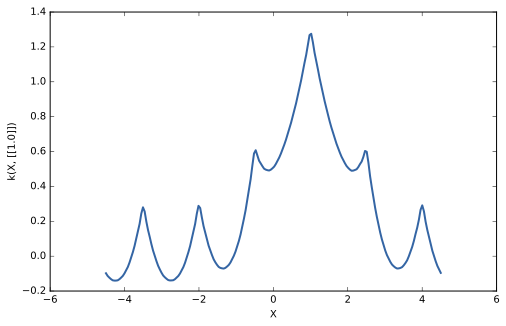

In [78]:
# Sum of kernels SE + Per
k1 = GPy.kern.RBF(input_dim=1, variance =1.0, lengthscale=1.0)
k2 = GPy.kern.PeriodicExponential(variance=10.0, lengthscale=1.0, period=1.5)
k_sum = k1 +k2
print k_sum
_ = k_sum.plot(ax=plt.gca())

  sum.              |  value  |  constraints  |  priors
  rbf.variance      |    2.0  |      +ve      |        
  rbf.lengthscale   |    0.8  |      +ve      |        
  linear.variances  |    1.0  |      +ve      |        


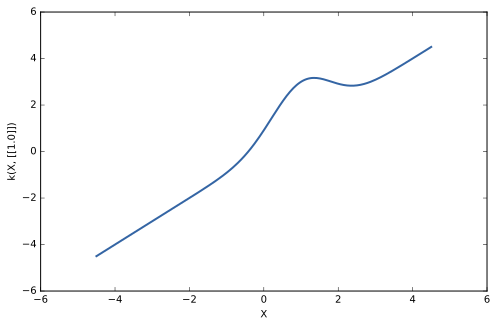

In [68]:
# Sum of Lin + SE
k1 = GPy.kern.RBF(input_dim=1, variance =2.0, lengthscale=0.8)
k3 = GPy.kern.Linear(input_dim=1, variances =1.0)
k_sum = k1 + k3
print k_sum
_ = k_sum.plot(ax=plt.gca())

  sum.                              |  value  |  constraints  |  priors
  periodic_exponential.variance     |   12.0  |      +ve      |        
  periodic_exponential.lengthscale  |    1.0  |      +ve      |        
  periodic_exponential.period       |    2.0  |      +ve      |        
  linear.variances                  |    1.0  |      +ve      |        


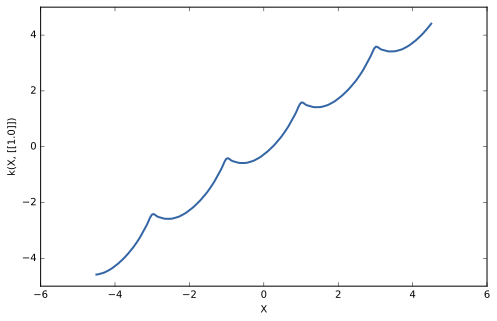

In [63]:
# Sum of Lin + Per
k2 = GPy.kern.PeriodicExponential(variance=12.0, lengthscale=1.0, period=2.0)
k3 = GPy.kern.Linear(input_dim=1, variances =1.0)
k_sum = k2 + k3
print k_sum
_ = k_sum.plot(ax=plt.gca())

  sum.               |  value  |  constraints  |  priors
  rbf.variance       |    3.5  |      +ve      |        
  rbf.lengthscale    |    4.0  |      +ve      |        
  rbf_1.variance     |    1.0  |      +ve      |        
  rbf_1.lengthscale  |   0.15  |      +ve      |        


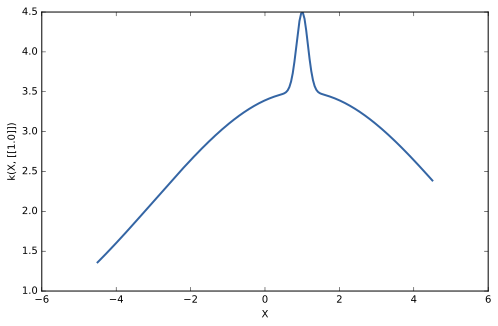

In [80]:
# Sum of SE + SE
k1 = GPy.kern.RBF(input_dim=1, variance =3.5, lengthscale=4.0)
k2 = GPy.kern.RBF(input_dim=1, variance =1.0, lengthscale=0.15)
k_sum = k1 + k2
print k_sum
_ = k_sum.plot(ax=plt.gca())